<a href="https://www.kaggle.com/code/fariskarim/complete-eda-fe-and-predictions-low-rmse?scriptVersionId=139838009" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/car-price/CarPrice_Assignment.csv
/kaggle/input/car-price/Data Dictionary - carprices.xlsx


In [2]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
data = pd.read_csv('/kaggle/input/car-price/CarPrice_Assignment.csv')
data = shuffle(data,random_state=1)

In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
78,79,2,mitsubishi outlander,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6669.0
97,98,1,nissan note,gas,std,four,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999.0
151,152,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6338.0
44,45,1,isuzu D-Max,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5
40,41,0,honda accord,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,10295.0


In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### No null values

In [6]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

### Perform some EDA 

This step mainly helped me find the relationship between variables I wasn't familiar with and the price

array([[<Axes: title={'center': 'car_ID'}>,
        <Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>],
       [<Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>],
       [<Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peakrpm'}>,
        <Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

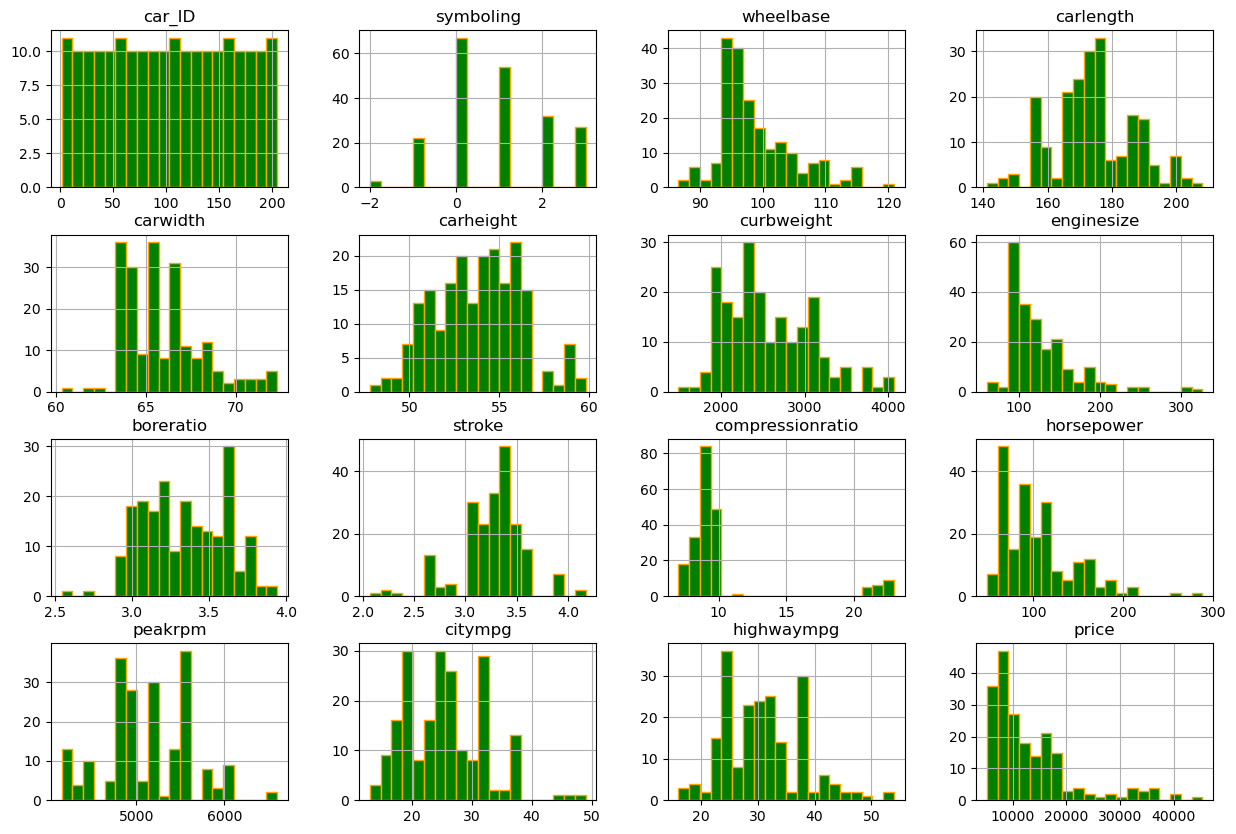

In [9]:
data.hist(bins=20, figsize =(15,10), color= 'green', edgecolor='orange')

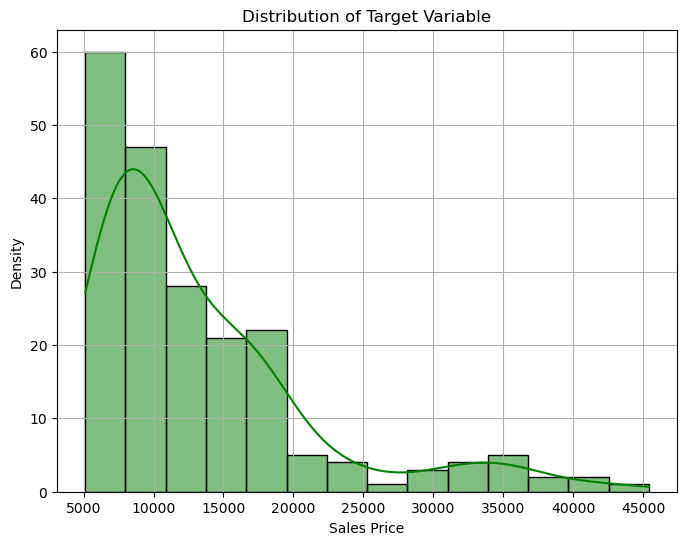

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True, color='green')
plt.title('Distribution of Target Variable')
plt.xlabel('Sales Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()

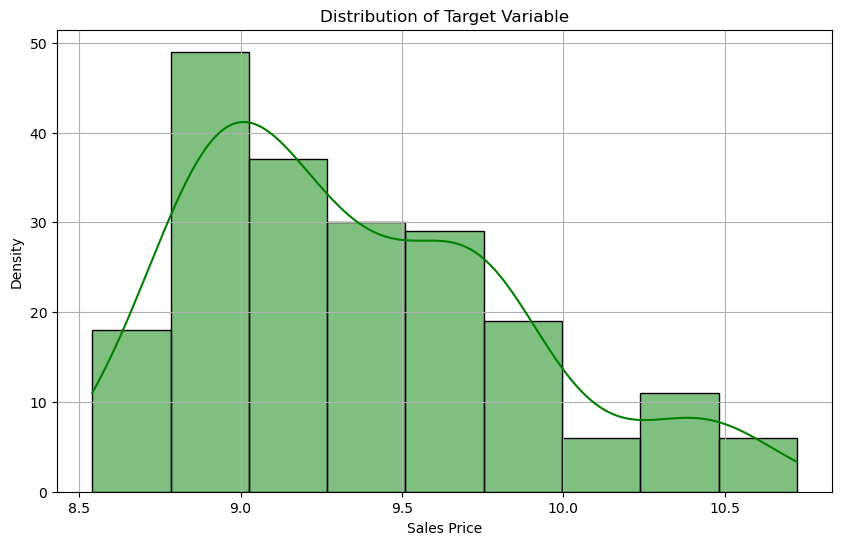

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(data['price']), kde=True, color='green')
plt.title('Distribution of Target Variable')
plt.xlabel('Sales Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()

#### Target variable is skewed, consider using the log transformed target variable

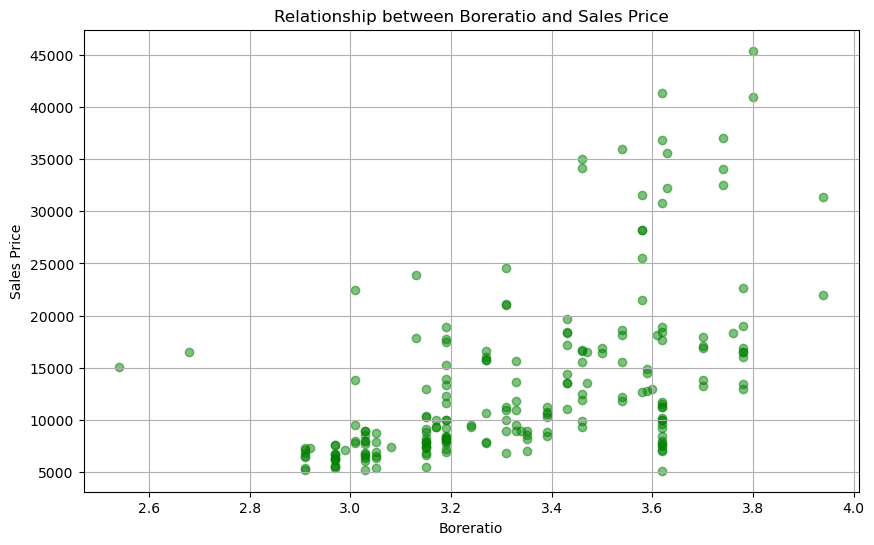

In [12]:


plt.figure(figsize=(10, 6))
plt.scatter(data['boreratio'], data['price'], alpha=0.5,color='green')
plt.title('Relationship between Boreratio and Sales Price')
plt.xlabel('Boreratio')
plt.ylabel('Sales Price')
plt.grid(True)
plt.show()

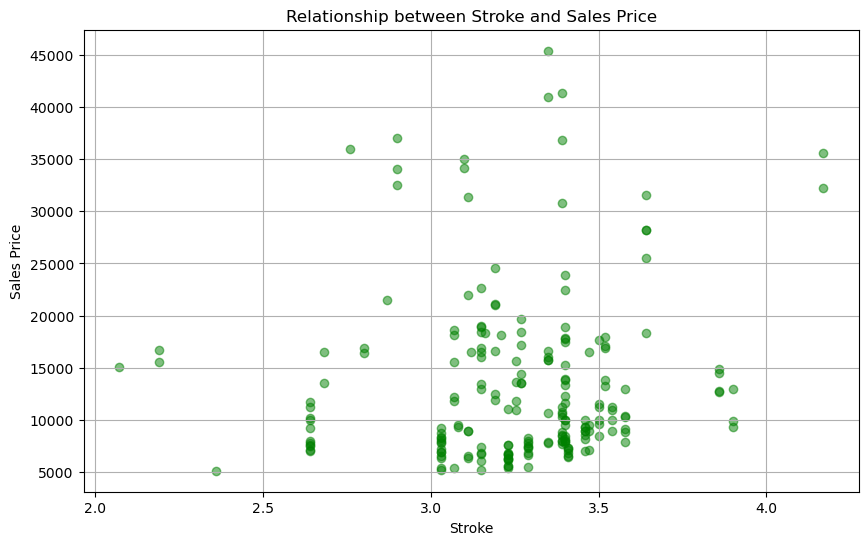

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(data['stroke'], data['price'], alpha=0.5,color='green')
plt.title('Relationship between Stroke and Sales Price')
plt.xlabel('Stroke')
plt.ylabel('Sales Price')
plt.grid(True)
plt.show()

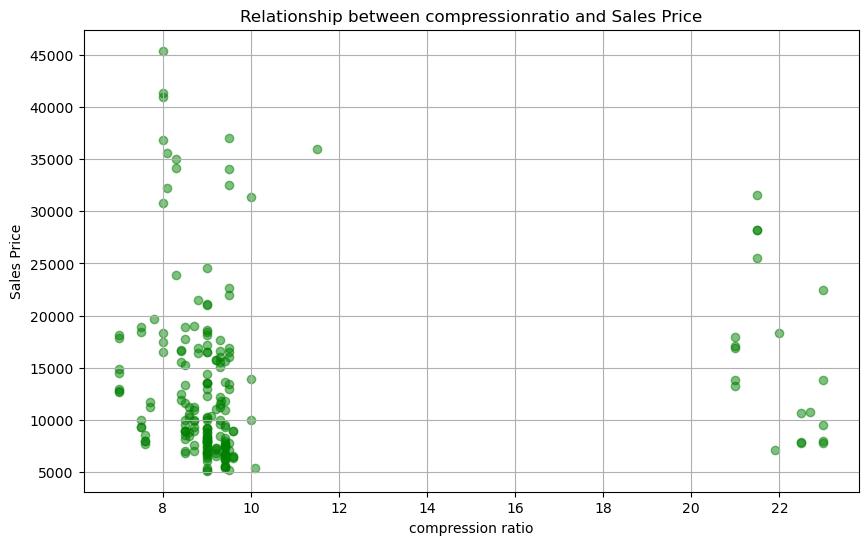

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(data['compressionratio'], data['price'], alpha=0.5,color='green')
plt.title('Relationship between compressionratio and Sales Price')
plt.xlabel('compression ratio')
plt.ylabel('Sales Price')
plt.grid(True)
plt.show()

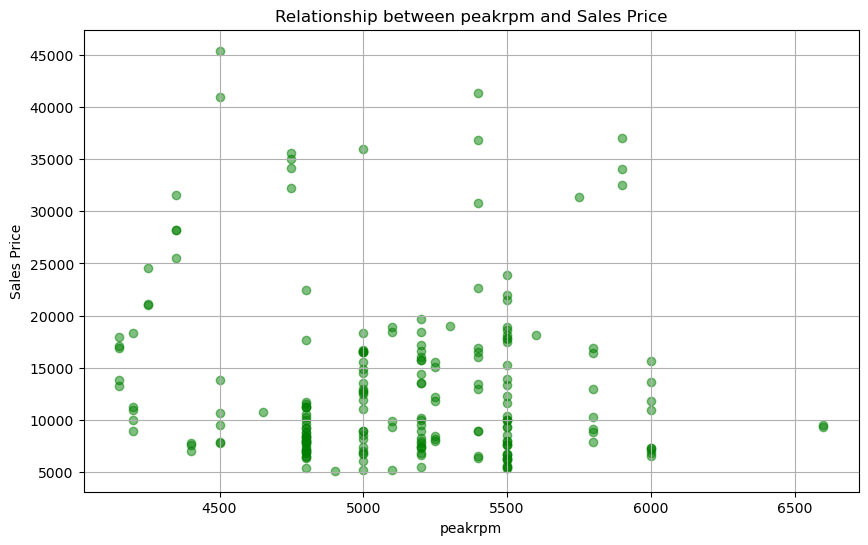

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(data['peakrpm'], data['price'], alpha=0.5,color='green')
plt.title('Relationship between peakrpm and Sales Price')
plt.xlabel('peakrpm')
plt.ylabel('Sales Price')
plt.grid(True)
plt.show()

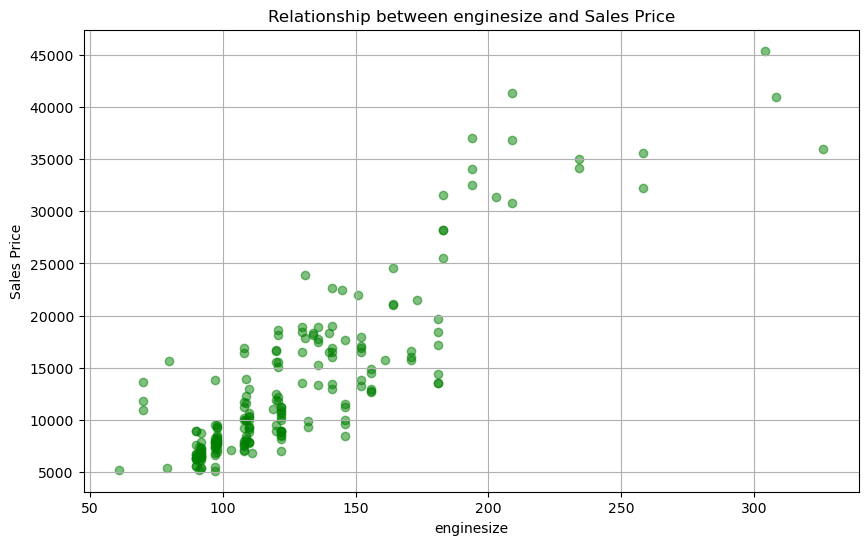

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(data['enginesize'], data['price'], alpha=0.5,color='green')
plt.title('Relationship between enginesize and Sales Price')
plt.xlabel('enginesize')
plt.ylabel('Sales Price')
plt.grid(True)
plt.show()

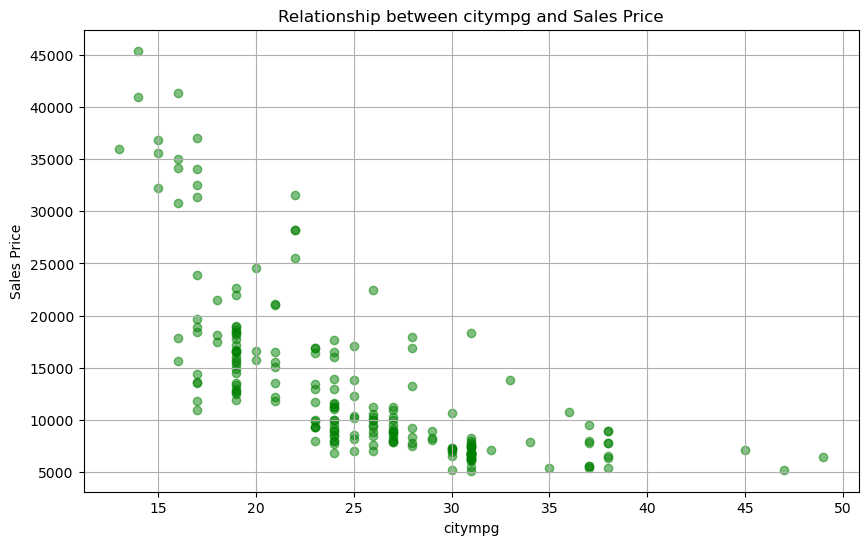

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(data['citympg'], data['price'], alpha=0.5,color='green')
plt.title('Relationship between citympg and Sales Price')
plt.xlabel('citympg')
plt.ylabel('Sales Price')
plt.grid(True)
plt.show()

In [18]:
correlation = data.corr()

corr_target = correlation['price'].sort_values(ascending=False)
corr_target

/tmp/ipykernel_20/3291880280.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

#### Creating a new feature which groups the car names by their brands

In [19]:
data['enginetype'].unique()

array(['ohc', 'l', 'dohc', 'ohcf', 'rotor', 'ohcv', 'dohcv'], dtype=object)

In [20]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
78,79,2,mitsubishi outlander,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6669.0
97,98,1,nissan note,gas,std,four,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999.0
151,152,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6338.0
44,45,1,isuzu D-Max,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,8916.5
40,41,0,honda accord,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,10295.0


In [21]:
data['BRthreshold'] = data['boreratio'].apply(lambda x: 1 if x > 3.5 else 0)
data['EGthreshold'] = data['enginesize'].apply(lambda x: 2 if x > 175 else 0 if x < 125 else 1)
data['carsize'] = data['carlength'] + data['carwidth']

In [22]:
data['cylindernumber'].unique()

cylinder_map = {
    'four': 4,
    'five': 5,
    'three': 3,
    'six': 6,
    'two': 2,
    'eight': 8,
    'twelve': 12
}

data['cylindernumber'] = data['cylindernumber'].map(cylinder_map)
data['cylindernumber'].unique()

array([ 4,  5,  3,  6,  2,  8, 12])

In [23]:
data['CarBrand'] = data['CarName'].apply(lambda x: 'Alfa-romero' if 'alfa-romero' in x.lower() else 
                                         ('Chevrolet' if 'chevrolet' in x.lower() else 
                                          ('Dodge' if 'dodge' in x.lower() else 
                                           ('Audi' if 'audi' in x.lower() else 
                                            ('Honda' if 'honda' in x.lower() else 
                                             ('Buick' if 'buick' in x.lower() else
                                              ('Jaguar' if 'jaguar' in x.lower() else 
                                               ('Mazda' if 'mazda' in x.lower() or 'maxda' in x.lower() else
                                                ('Mercury' if 'mercury'in x.lower() else
                                                ('Mitsubishi' if 'mitsubishi'in x.lower() else
                                                 ('Nissan' if 'nissan' in x.lower() else
                                                  ('Peugeot' if 'peugeot' in x.lower() else
                                                   ('Plymouth'if 'plymouth' in x.lower() else
                                                    ('Porsche' if 'porsche' in x.lower() else
                                                     ('Renault' if 'renault' in x.lower() else
                                                      ('Saab' if 'saab' in x.lower() else
                                                       ('Subaru' if 'subaru' in x.lower() else
                                                        ('Toyota' if 'toyota' in x.lower() else
                                                         ('Volkswagen' if 'volkswagen' in x.lower() or 'vw' in x.lower() else
                                                          ('Volvo' if 'volvo' in x.lower() else
                                                           ('Isuzu' if 'isuzu' in x.lower() else 
                                                            ('BMW' if 'bmw' in x.lower() else None))))))))))))))))))))))


In [24]:
average_prices = data.groupby('CarBrand')['price'].mean()
print(average_prices)
print(data['CarBrand'].value_counts())

CarBrand
Alfa-romero    15498.333333
Audi           17859.166714
BMW            26118.750000
Buick          33647.000000
Chevrolet       6007.000000
Dodge           7875.444444
Honda           8184.692308
Isuzu           8916.500000
Jaguar         34600.000000
Mazda          10652.882353
Mercury        16503.000000
Mitsubishi      9239.769231
Nissan         10415.666667
Peugeot        15489.090909
Plymouth        7963.428571
Porsche        31118.625000
Renault         9595.000000
Saab           15223.333333
Subaru          8541.250000
Toyota          9696.645161
Volkswagen     10286.818182
Volvo          18063.181818
Name: price, dtype: float64
Toyota         31
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Subaru         12
Volvo          11
Peugeot        11
Volkswagen     11
Dodge           9
Buick           8
BMW             8
Audi            7
Plymouth        7
Saab            6
Isuzu           4
Porsche         4
Chevrolet       3
Jaguar          3
Alfa-

In [25]:
high_end = ['Jaguar', 'Porsche', 'BMW', 'Buick','Audi']
mid_range = ['Toyota', 'Nissan', 'Mazda', 'Volvo', 'Volkswagen', 'Saab', 'Isuzu','Mercury', 'Peugeot','Alfa-romero']
budget = ['Plymouth', 'Renault','Chevrolet','Honda','Dodge','Mitsubishi','Subaru']

data['ExpensiveTier'] = data['CarBrand'].apply(lambda x: 2 if x in high_end else (1 if x in mid_range else 0))


In [26]:
filtered_rows = data[(data['ExpensiveTier'] == 2) & (data['price'] < 20000)]
filtered_rows

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,horsepower,peakrpm,citympg,highwaympg,price,BRthreshold,EGthreshold,carsize,CarBrand,ExpensiveTier
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,115,5500,18,22,17450.000,0,1,243.0,Audi,2
11,12,0,bmw 320i,gas,std,four,sedan,rwd,front,101.2,...,101,5800,23,29,16925.000,0,0,241.6,BMW,2
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,110,5500,19,25,15250.000,0,1,243.6,Audi,2
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,110,5500,19,25,17710.000,0,1,264.1,Audi,2
10,11,2,bmw 320i,gas,std,two,sedan,rwd,front,101.2,...,101,5800,23,29,16430.000,0,0,241.6,BMW,2
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,160,5500,16,22,17859.167,0,1,246.1,Audi,2
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,102,5500,24,30,13950.000,0,0,242.8,Audi,2
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,110,5500,19,25,18920.000,0,1,264.1,Audi,2


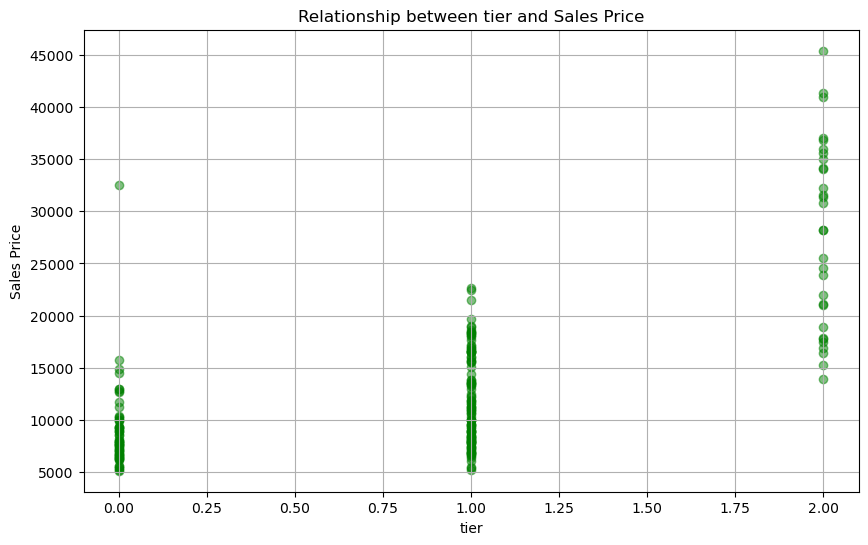

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(data['ExpensiveTier'], data['price'], alpha=0.5,color='green')
plt.title('Relationship between tier and Sales Price')
plt.xlabel('tier')
plt.ylabel('Sales Price')
plt.grid(True)
plt.show()

#### Drop irrelevant columns; some of the columns dropped you might include, this is subjective

In [28]:
data_cleaned = data.drop(columns=['symboling','car_ID','compressionratio','stroke','peakrpm','carheight','CarName','aspiration','doornumber','enginetype','BRthreshold','carlength','carsize'])

In [29]:
data_cleaned.head()

,fueltype,carbody,drivewheel,enginelocation,wheelbase,carwidth,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,EGthreshold,CarBrand,ExpensiveTier
78,gas,hatchback,fwd,front,93.7,64.4,2004,4,92,2bbl,2.97,68,31,38,6669.0,0,Mitsubishi,0
97,gas,wagon,fwd,front,94.5,63.8,2037,4,97,2bbl,3.15,69,31,37,7999.0,0,Nissan,1
151,gas,hatchback,fwd,front,95.7,63.6,2040,4,92,2bbl,3.05,62,31,38,6338.0,0,Toyota,1
44,gas,sedan,fwd,front,94.5,63.6,1874,4,90,2bbl,3.03,70,38,43,8916.5,0,Isuzu,1
40,gas,sedan,fwd,front,96.5,62.5,2372,4,110,1bbl,3.15,86,27,33,10295.0,0,Honda,0


In [30]:
categorical_columns = data_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

['fueltype',
 'carbody',
 'drivewheel',
 'enginelocation',
 'fuelsystem',
 'CarBrand']

In [31]:
data_cleaned = pd.get_dummies(data_cleaned)

In [32]:
data_cleaned.head()

,wheelbase,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,CarBrand_Nissan,CarBrand_Peugeot,CarBrand_Plymouth,CarBrand_Porsche,CarBrand_Renault,CarBrand_Saab,CarBrand_Subaru,CarBrand_Toyota,CarBrand_Volkswagen,CarBrand_Volvo
78,93.7,64.4,2004,4,92,2.97,68,31,38,6669.0,...,0,0,0,0,0,0,0,0,0,0
97,94.5,63.8,2037,4,97,3.15,69,31,37,7999.0,...,1,0,0,0,0,0,0,0,0,0
151,95.7,63.6,2040,4,92,3.05,62,31,38,6338.0,...,0,0,0,0,0,0,0,1,0,0
44,94.5,63.6,1874,4,90,3.03,70,38,43,8916.5,...,0,0,0,0,0,0,0,0,0,0
40,96.5,62.5,2372,4,110,3.15,86,27,33,10295.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data_cleaned.shape

(205, 54)

In [34]:
from sklearn.model_selection import train_test_split

X = data_cleaned.drop(columns=['price'])
y = data_cleaned['price']


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (164, 53)
X_test shape: (41, 53)
y_train shape: (164,)
y_test shape: (41,)


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


linear_model = LinearRegression()

mse_scores = cross_val_score(linear_model, X_train, y_train, cv=8, scoring='neg_mean_squared_error')
# Calculate RMSE scores for each fold
rmse_scores = np.sqrt(-mse_scores)

print("RMSE scores for each fold:", rmse_scores)
print("Mean RMSE score:", rmse_scores.mean())

RMSE scores for each fold: [2433.32797033 2593.26289447 2242.57858215 3932.5140705  3800.61751216
 2068.69765439 3093.28308841 1936.55420121]
Mean RMSE score: 2762.6044967027037


In [37]:
def aggregate_permutation_importance(model, X_test, y_test, categorical_columns):
    perm = PermutationImportance(model).fit(X_test, y_test)
    feature_importances = perm.feature_importances_
    importance_dict = dict(zip(X_test.columns, feature_importances))
    display(eli5.show_weights(perm, feature_names=X_test.columns.tolist()))

    for column in categorical_columns:
        dummies_for_feature = [col for col in X_test.columns if col.startswith(column + "_")]
        aggregate_importance = sum(importance_dict[col] for col in dummies_for_feature if col in importance_dict)
        print(f"Aggregate importance for feature {column}: {aggregate_importance}")


In [38]:
linear_model = LinearRegression().fit(X_train, y_train)
aggregate_permutation_importance(linear_model, X_test, y_test, categorical_columns)


Weight,Feature
1.0018 ± 0.2306,enginesize
0.2997 ± 0.0417,cylindernumber
0.2320 ± 0.0602,horsepower
0.1116 ± 0.0688,boreratio
0.0853 ± 0.0251,carwidth
0.0660 ± 0.0379,ExpensiveTier
0.0302 ± 0.0259,CarBrand_Toyota
0.0301 ± 0.0211,curbweight
0.0234 ± 0.0075,carbody_hatchback
0.0193 ± 0.0140,CarBrand_Buick


Aggregate importance for feature fueltype: -0.0001263238972207148
Aggregate importance for feature carbody: 0.03004742364582544
Aggregate importance for feature drivewheel: 0.004980639606440018
Aggregate importance for feature enginelocation: 0.025246233347754755
Aggregate importance for feature fuelsystem: 0.004363032200998073
Aggregate importance for feature CarBrand: 0.0895583760770105


#### Now lets try out a RandomForest

In [39]:
n_estimators_values = [50,100, 150, 200, 300, 500]
results = []

for n_estimators in n_estimators_values:
    random_forest_model = RandomForestRegressor(n_estimators=n_estimators, random_state = 1)
    
    mse_scores = cross_val_score(random_forest_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-mse_scores)
    
    mean_rmse = rmse_scores.mean()
    results.append((n_estimators, mean_rmse))
    
    print(f"n_estimators = {n_estimators}, Mean RMSE = {mean_rmse}")

best_n_estimators, best_mean_rmse = min(results, key=lambda x: x[1])
print(f"Best n_estimators: {best_n_estimators}, Best Mean RMSE: {best_mean_rmse}")

n_estimators = 50, Mean RMSE = 2585.537403891966
n_estimators = 100, Mean RMSE = 2547.959543805804
n_estimators = 150, Mean RMSE = 2525.1433728272164
n_estimators = 200, Mean RMSE = 2530.8351743990606
n_estimators = 300, Mean RMSE = 2563.75163801835
n_estimators = 500, Mean RMSE = 2586.586332844173
Best n_estimators: 150, Best Mean RMSE: 2525.1433728272164


#### n_estimators = 150 gives the lowest RMSE, so we are going to train the model a final time using all the training data

In [40]:

final_model = RandomForestRegressor(n_estimators=150 )
final_model.fit(X_train, y_train)
aggregate_permutation_importance(final_model, X_test, y_test, categorical_columns)

Weight,Feature
0.7391 ± 0.2298,enginesize
0.1136 ± 0.0478,curbweight
0.0150 ± 0.0080,horsepower
0.0053 ± 0.0072,highwaympg
0.0036 ± 0.0084,ExpensiveTier
0.0013 ± 0.0040,citympg
0.0010 ± 0.0029,wheelbase
0.0009 ± 0.0010,drivewheel_fwd
0.0009 ± 0.0012,carbody_hardtop
0.0009 ± 0.0014,fuelsystem_2bbl


Aggregate importance for feature fueltype: -0.00025169453999989154
Aggregate importance for feature carbody: 0.002636949497343144
Aggregate importance for feature drivewheel: 0.0016950616432715338
Aggregate importance for feature enginelocation: 0.00010620656901552116
Aggregate importance for feature fuelsystem: 0.0013967550331107637
Aggregate importance for feature CarBrand: 0.0009151001244894319


In [41]:
final_model = RandomForestRegressor(n_estimators=150)

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

mse_final = mean_squared_error(y_pred, y_test)

rmse_final = np.sqrt(mse_final)
r2_test = r2_score(y_test, y_pred)


print("RMSE:      ", rmse_final)
print("R-squared:   ", r2_test)


RMSE:       1250.2952245503195
R-squared:    0.9762449356313688


##### Always looking to improve and plan to add on the modeling selection by using GridSearch and more regression models. Any tips would be appreciated!